In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [2]:
class AgentState(TypedDict):
    number1: int
    number2: int
    operation: str
    result: int

In [ ]:
def adder(state: AgentState) -> AgentState:
    """This node adds two numbers."""
    state['result'] = state['number1'] + state['number2']
    return state

def subtractor(state: AgentState) -> AgentState:
    """This node subtracts two numbers."""
    state['result'] = state['number1'] - state['number2']
    return state

def decide_next_node(state: AgentState) -> AgentState:
    """Decides which operation to perform based on the 'operation' field."""
    if state['operation'] == '+':
        return 'addition_operation'
    elif state['operation'] == '-':
        return 'subtraction_operation'
    else:
        raise ValueError("Invalid operation. Use '+' or '-'.")

In [9]:
graph = StateGraph(AgentState)

graph.add_node('router', lambda state: state)
graph.add_node('adder', adder)
graph.add_node('subtractor', subtractor)


graph.add_edge(START, 'router')
graph.add_conditional_edges(
    'router',
    decide_next_node,
    {
        # edge: node
        'addition_operation': 'adder',
        'subtraction_operation': 'subtractor',
    }
)
graph.add_edge('adder', END)
graph.add_edge('subtractor', END)

app = graph.compile()

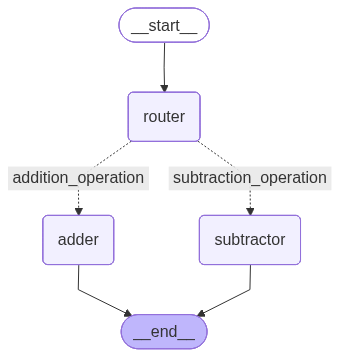

In [10]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [16]:
initial_state_1 = AgentState(
    number1= 10,
    number2= 5,
    operation= '+',
)

result_1 = app.invoke(initial_state_1)
print(result_1)

{'number1': 10, 'number2': 5, 'operation': '+', 'result': 15}


In [17]:
initial_state_2 = AgentState(
    number1= 10,
    number2= 5,
    operation= '-',
)

result_2 = app.invoke(initial_state_2)
print(result_2)

{'number1': 10, 'number2': 5, 'operation': '-', 'result': 5}
